In [1]:
import sys
sys.path.append(r'/home/tacuevas/github/oceanmesh/oceanmesh')
from subset_mesh import *

## just to avoid the pandas warning: A value is trying to be set on a copy of a slice from a DataFrame.
import warnings
warnings.filterwarnings('ignore')

#### Packages version

In [2]:
print(f'Pandas version: {pd.__version__}')
print(f'Numpy version: {np.__version__}')
print(f'Rtree version: {rtree.__version__}')
print(f'Matplotlib version: {mpl.__version__}')
print(f'Geopandas version: {gpd.__version__}')
import shapely
print(f'Shapely version: {shapely.__version__}')

Pandas version: 1.4.3
Numpy version: 1.24.3
Rtree version: 1.0.1
Matplotlib version: 3.7.1
Geopandas version: 0.13.0
Shapely version: 2.0.1


#### Workflow

To subset a fort.14 file using a shapefile mask, you only need to call the ```subsetMesh``` function.<br>
The function's workflow follows the next steps:<br>
- Reads the original **fort.14** nodes as a dataframe with ```readNodes```<br>
- Reads the mask **shapefile** as a geopandas GeoDataFrame with ```reaSubDomain``` (polygon covering the area we want to remove) <br>
- Removes the elements with centroid inside the mask and renumber the nodes with ```subsetMeshGdf```<br>
- Reads the boundary conditions of the original **fort.14** file with ```readOrgBC```<br>
- Renumber the ocean boundary nodes with ```renumOceanBC```<br>
- Renumber the closed land boundary (islands) nodes with ```renumClosedBCs```<br>
- Renumber the mainland boundary nodes with ```renumMainlandBC```<br>
- Writes the new fort.14 with ```writeFort14```

#### Example

In this example I'm working with a mesh developed by Johnathan Woodruf that covers the entire north Atlantic with floodplians over the South Atlantic Bight. The goal is to remove the floodplains from Florida, Georgia and South Carolina.

In [3]:
## define inputs, there is a more detailed description in the subset_fort14.py file
f14in = r'/mnt/drive1/Insyncs/NCSU/thesis/models/adcirc/Florence_SABv3-60m/fort.14' # input fort.14
f14out = r'/mnt/drive1/Insyncs/NCSU/thesis/analysis/test_oceanmesh/fort.14' # output fort.14
epsg = 4326 # mesh coordinate reference system
# geopackage (similar to shp) with mask polygon, must be in the same crs of the mesh
subDomFile = r'/mnt/drive1/Insyncs/NCSU/thesis/gis/gpkg/mask_removing_floodplains_SABv5.gpkg'
sortBy = 1 # Default value. Indicates what coordinate to use for sorting the ocean boundary nodes
rev = False # Default value. How to sort the ocean boundary nodes

In [5]:
subsetMesh(f14in, subDomFile, f14out, epsg, sortBy, rev)

Mesh subset process started
  Mesh nodes as DataFrame: 0.07 min
  Mesh to GeoDataFrame: 1.95 min
  Read subdomain: 0.00 min
  Subset mesh: 0.70 min
  Read fort.14 boundary conditions: 0.03 min
  Update numbering ocean boundary condition: 0.02 min
  Update numbering closed land boundary conditions: 0.02 min
  Update numbering closed land boundary conditions: 2.60 min
  Writing new fort.14: 1.72 min
Done with fort.14 subset: 7.11 min


Done! the new fort.14 was created. Now we will use the function fort14togdf to display both meshes

In [6]:
gdfIn = meshtogdf(f14in, epsg, epsg) ## transform original mesh to geodataframe
gdfOut = meshtogdf(f14out, epsg, epsg) ## transform new mesh to geodataframe
mask = readSubDomain(subDomFile, epsg) ## read mask as geodataframe

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

Text(831.7108585858584, 0.5, 'Latitude [deg]')

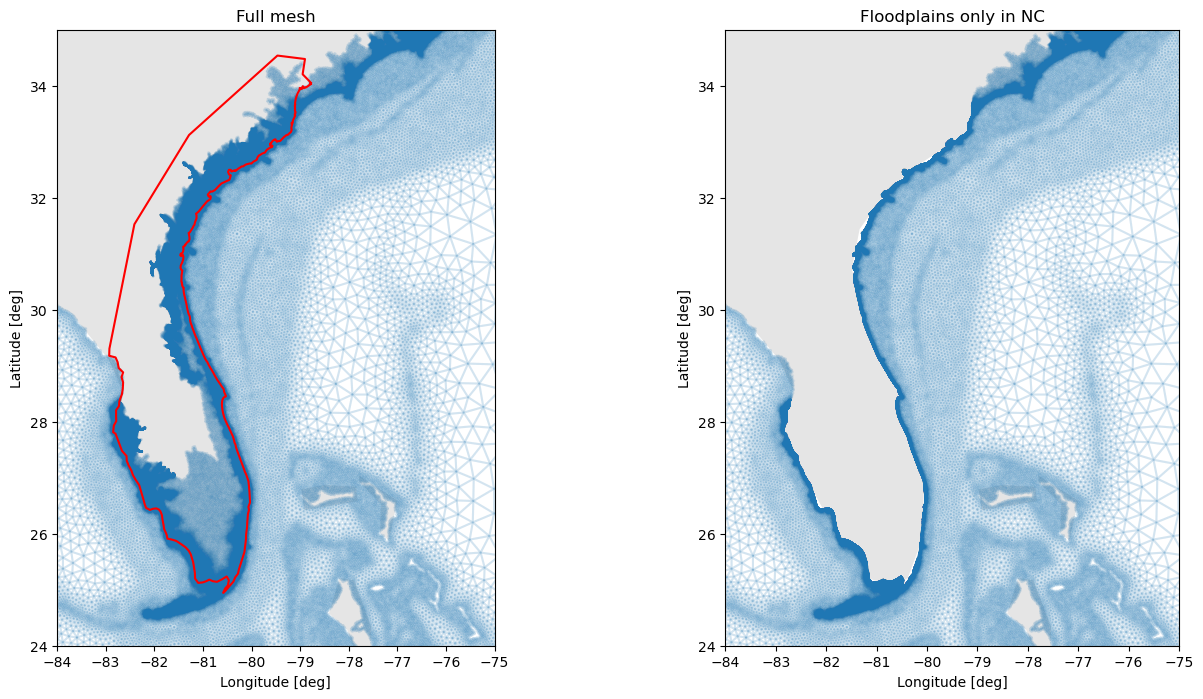

In [8]:
fig, ax = plt.subplots(figsize = (16, 8), ncols = 2)

world.plot(ax = ax[0], color = 'grey', alpha = 0.2)
gdfIn.boundary.plot(ax = ax[0], alpha = 0.1)
mask.boundary.plot(ax = ax[0], color = 'r', alpha = 1)

ax[0].set_title('Full mesh')
ax[0].set_xlim([-84, -75])
ax[0].set_ylim([24, 35])
ax[0].set_xlabel('Longitude [deg]')
ax[0].set_ylabel('Latitude [deg]')

world.plot(ax = ax[1], color = 'grey', alpha = 0.2)
gdfOut.boundary.plot(ax = ax[1], alpha = 0.1)

ax[1].set_title('Floodplains only in NC')
ax[1].set_xlim([-84, -75])
ax[1].set_ylim([24, 35])
ax[1].set_xlabel('Longitude [deg]')
ax[1].set_ylabel('Latitude [deg]')